In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

# # Define your search query
path="../../Data/twitterdata/"
twitterData=pd.read_csv(os.path.join(path,"Mental-Health-Twitter.csv"))
cols=twitterData.columns.to_list()
print(cols)

cols.pop(0)

twitterData=twitterData[cols]
df = twitterData.copy()


['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id', 'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label']


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ MB


In [4]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)


,column_name,percentage
0,post_id,0.0
1,post_created,0.0
2,post_text,0.0
3,user_id,0.0
4,followers,0.0
5,friends,0.0
6,favourites,0.0
7,statuses,0.0
8,retweets,0.0
9,label,0.0


In [5]:
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)

In [9]:
df.columns

Index(['post_created', 'post_text', 'followers', 'friends', 'favourites',
       'statuses', 'retweets', 'label'],
      dtype='object')

In [8]:
#correlation
df.corr()

ValueError: could not convert string to float: 'Sun Aug 30 07:48:37 +0000 2015'

In [7]:
df.head()

,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [10]:
#datetime object
df.post_created=df.post_created.apply(pd.to_datetime)

df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year

df.drop("post_created", axis=1, inplace=True)

In [11]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


In [12]:
#describe to numerical values
df.describe().T


,count,mean,std,min,25%,50%,75%,max
followers,20000.0,900.48395,1899.913961,0.0,177.0,476.0,1197.0,28614.0
friends,20000.0,782.42875,1834.817945,0.0,211.0,561.0,701.0,28514.0
favourites,20000.0,6398.23555,8393.072914,0.0,243.0,2752.0,8229.0,39008.0
statuses,20000.0,44394.41960,140778.519201,3.0,5129.0,13251.0,52892.0,1063601.0
retweets,20000.0,1437.92730,15119.665118,0.0,0.0,0.0,1.0,839540.0
label,20000.0,0.50000,0.500013,0.0,0.0,0.5,1.0,1.0
month,20000.0,6.71135,4.735351,1.0,1.0,8.0,12.0,12.0
year,20000.0,2015.48595,1.485434,2009.0,2015.0,2016.0,2016.0,2017.0



## Text Preprocessing

In [19]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [14]:
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
df["post_text"] = df["post_text"].str.replace("\d","")

In [16]:
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

In [21]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


[nltk_data] Downloading package stopwords to /home/shakir/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
from textblob import Word
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package punkt to /home/shakir/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/shakir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/shakir/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

In [29]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" "))) 

In [30]:
df.groupby("frequency").max()
df[df["post_text"].str.contains("sos unique")]
longest_comment=df.iloc[3038,0]
print(longest_comment)

rt @5sos: unique new york unique new york unique new york unique new york unique new york unique new york unique new york unique new york u…


In [31]:
df_depression = df[df['label'] == 1]
df_depression


,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",15
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,8,2015,"[sunday, need, break, i, 'm, planning, spend, ...",10
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16
...,...,...,...,...,...,...,...,...,...,...,...
9995,"rt @cslewisu: ""we agreed forgiveness beautiful...",78,175,664,1148,217,1,4,2015,"[rt, cslewisu, we, agreed, forgiveness, beauti...",10
9996,can't believe year. #blastyblast #wlmhk #picst...,78,175,664,1148,0,1,4,2015,"[ca, n't, believe, year, blastyblast, wlmhk, p...",7
9997,"one year ago, journey began. never knew challe...",78,175,664,1148,0,1,4,2015,"[one, year, ago, journey, began, never, knew, ...",13
9998,found new hammocking friends park today. gotta...,78,175,664,1148,0,1,4,2015,"[found, new, hammocking, friends, park, today,...",12


In [33]:
nltk.download('averaged_perceptron_tagger')

TextBlob(longest_comment).tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shakir/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('rt', 'NN'),
 ('@', 'VBZ'),
 ('5sos', 'CD'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('u…', 'NN')]

In [34]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",15
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,8,2015,"[sunday, need, break, i, 'm, planning, spend, ...",10
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16


### Data Visualization

In [35]:

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [36]:
text = " ".join(i for i in df_depression.post_text)

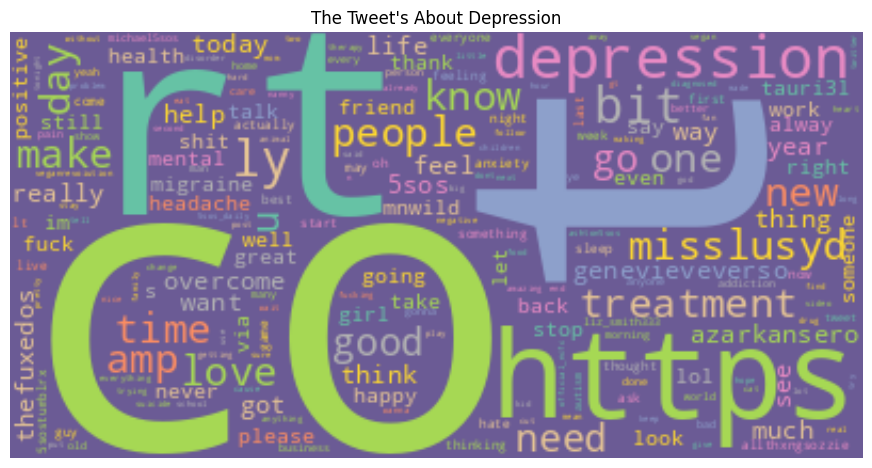

In [37]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Tweet's About Depression") #political tweets (republican) low depreresion?
plt.show()

In [38]:
print("\n",
      "\n",text.count("yw"),#135 for non depressive,, 115 for depressive
      "\n",text.count("people"), #need for connection 320+140 tweets "others"D, complaining
      "\n",text.count("migraine"), # 100 tweets about health (not mental health), 171 people with depression tweet about migraines
      "\n",text.count("depression"),
      "\n",text.count("overcome"),
      "\n",text.count("want"),
      "\n",text.count("friend"),
      "\n",text.count("hope"),
      "\n",text.count("sos"), ## people who seek out help are more likely to be depressed
      "\n",text.count("shit"),##440 curse words
     )


 
 92 
 320 
 171 
 941 
 224 
 252 
 207 
 72 
 737 
 189


In [39]:
data = {
    "title": ["rt", "im" ,"one", "depression", "dont", "time", 
              "love","know","thank", "people"],
    "count": [6630, 3328 ,2063, 950, 887, 785, 754, 729, 702, 593],
}


In [40]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,rt,6630
1,im,3328
2,one,2063
3,depression,950
4,dont,887
5,time,785
6,love,754
7,know,729
8,thank,702
9,people,593


In [ ]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)


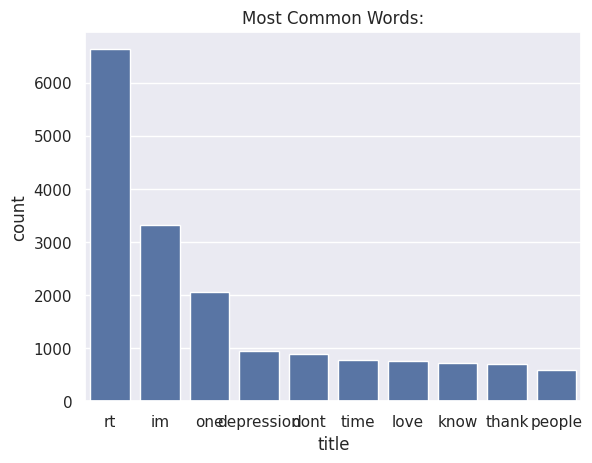

In [41]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

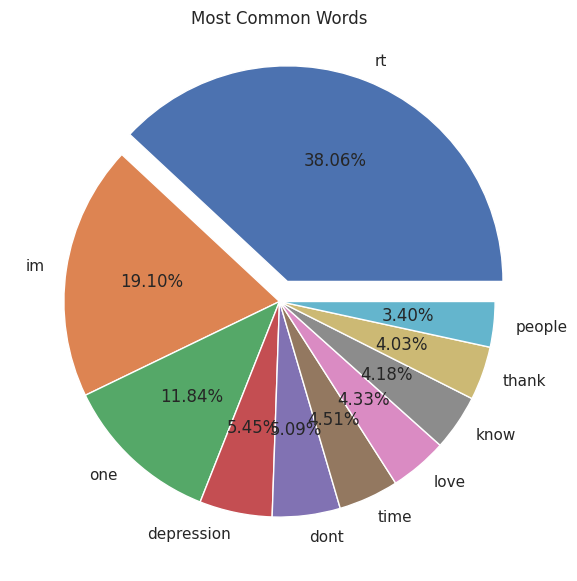

In [42]:


fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()



In [43]:
df.groupby("month").count()

,post_text,followers,friends,favourites,statuses,retweets,label,year,tokens,frequency
month,,,,,,,,,,
1,6118,6118,6118,6118,6118,6118,6118,6118,6118,6118
2,435,435,435,435,435,435,435,435,435,435
3,1123,1123,1123,1123,1123,1123,1123,1123,1123,1123
4,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
5,644,644,644,644,644,644,644,644,644,644
6,8,8,8,8,8,8,8,8,8,8
7,359,359,359,359,359,359,359,359,359,359
8,659,659,659,659,659,659,659,659,659,659
9,639,639,639,639,639,639,639,639,639,639


In [44]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",15
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,8,2015,"[sunday, need, break, i, 'm, planning, spend, ...",10
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16


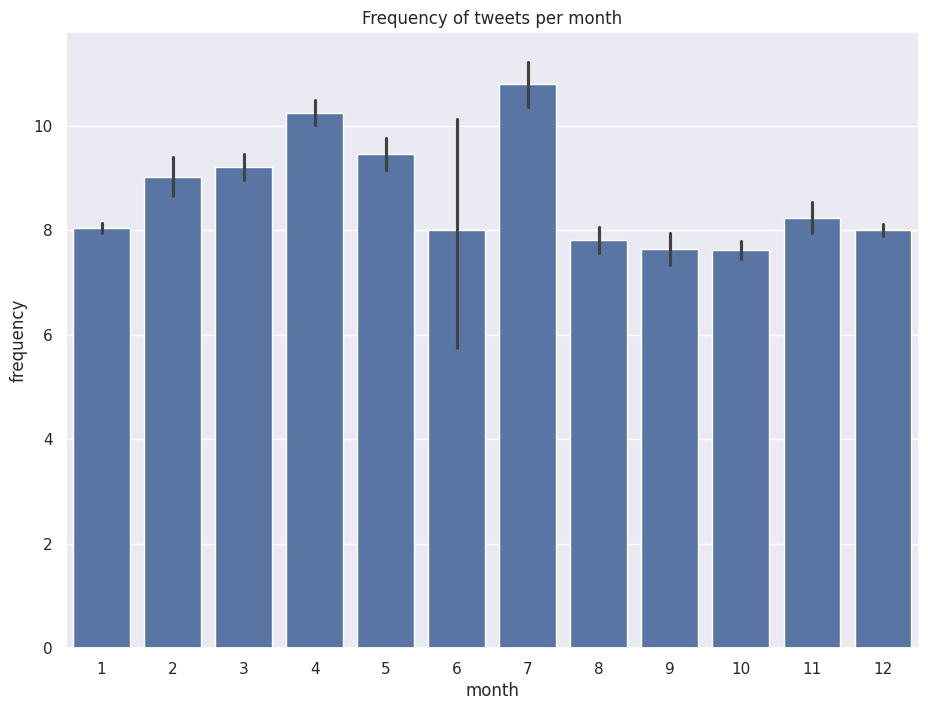

In [45]:


sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="frequency").set(title="Frequency of tweets per month");



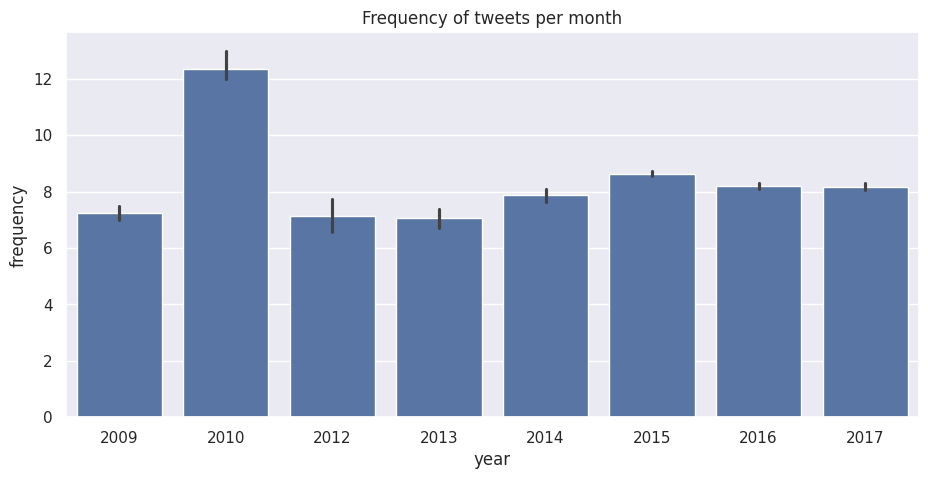

In [46]:


sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="frequency").set(title="Frequency of tweets per month");



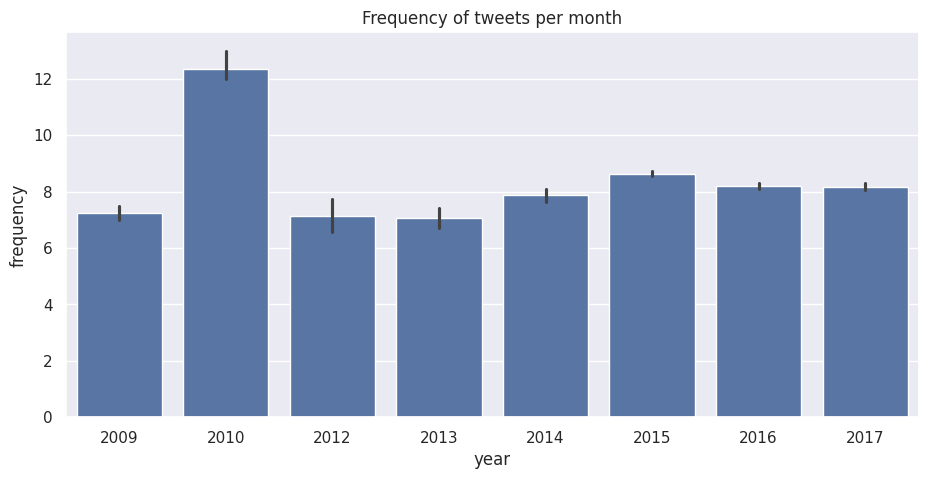

In [47]:


sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="frequency").set(title="Frequency of tweets per month");



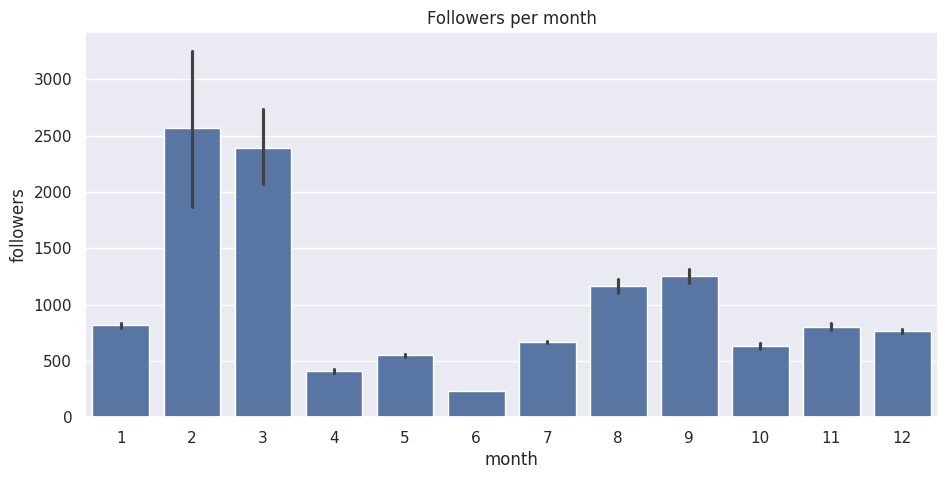

In [48]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="month", y="followers").set(title="Followers per month");

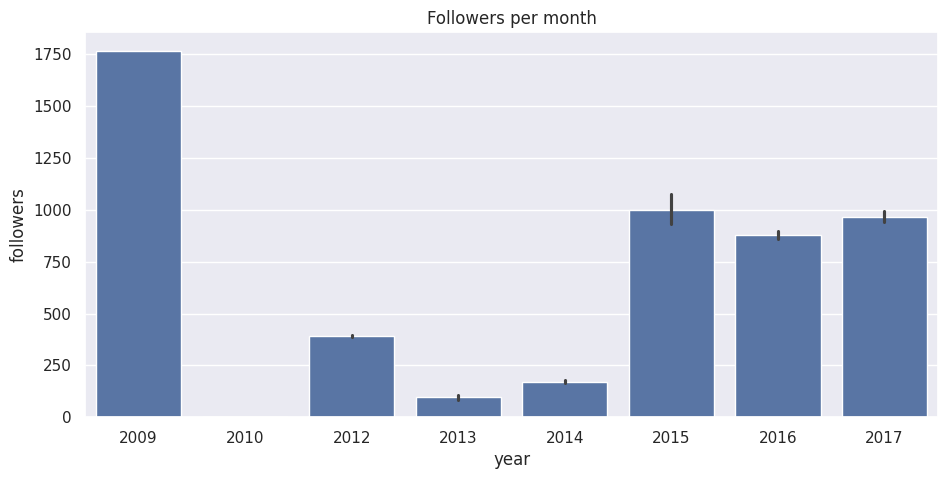

In [49]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="year", y="followers").set(title="Followers per month");

/tmp/ipykernel_411692/2322340494.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.followers, shade=True,).set(title="Density of followers"); # dağılım grafiği


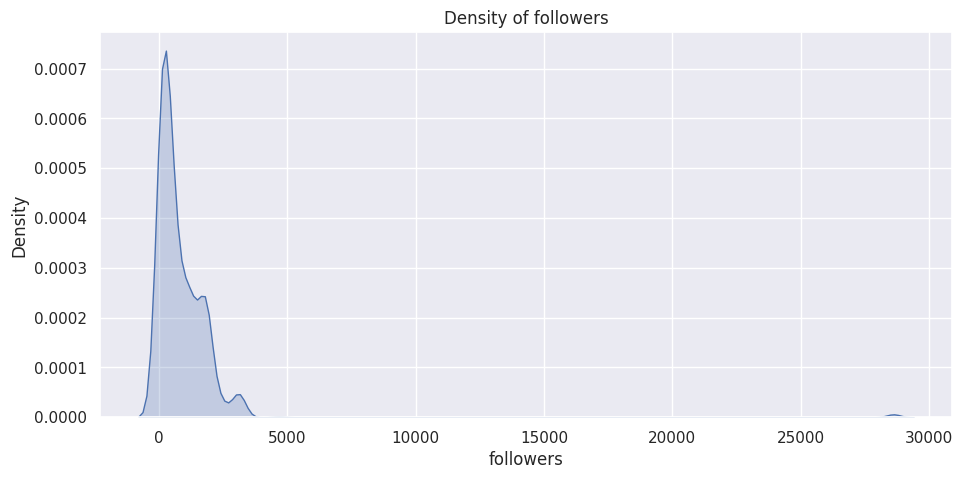

In [50]:
sns.kdeplot(x=df.followers, shade=True,).set(title="Density of followers"); # dağılım grafiği

/tmp/ipykernel_411692/3785249972.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.retweets, shade=True,).set(title="Density of retweets"); # dağılım grafiği


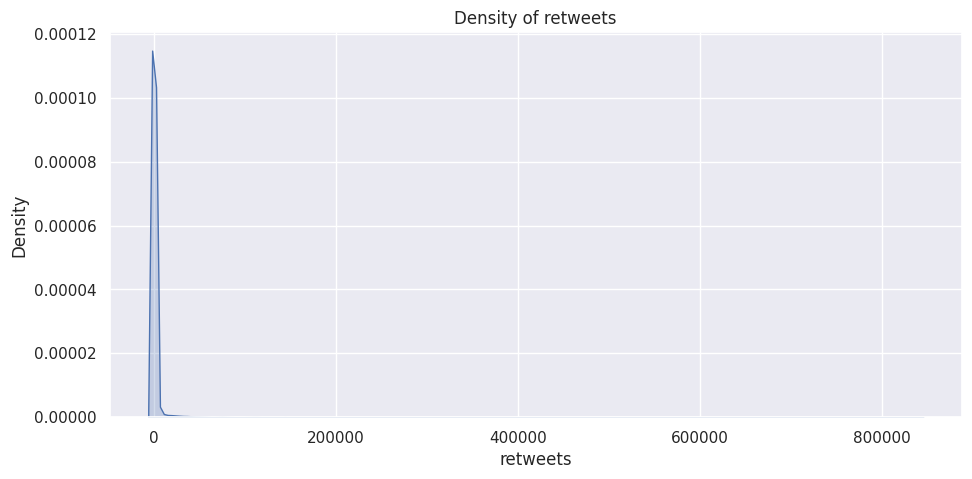

In [51]:
sns.kdeplot(x=df.retweets, shade=True,).set(title="Density of retweets"); # dağılım grafiği

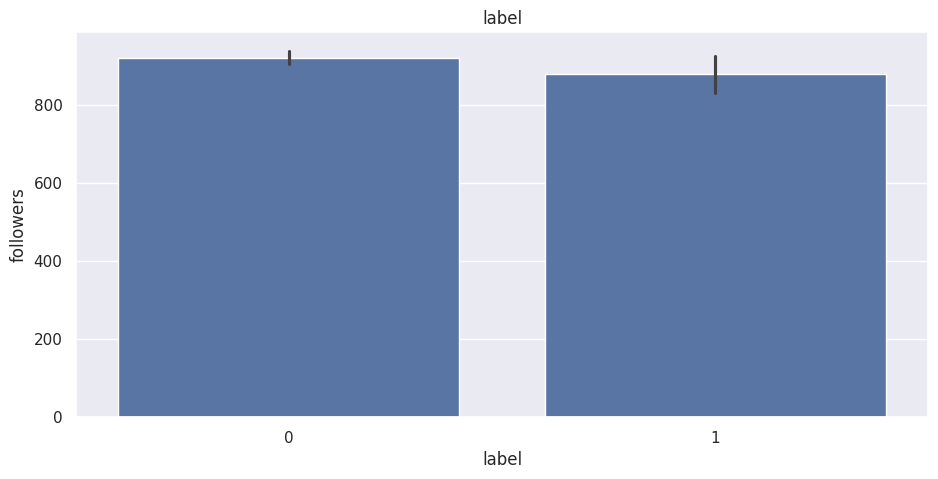

In [52]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="label", y="followers").set(title="label");


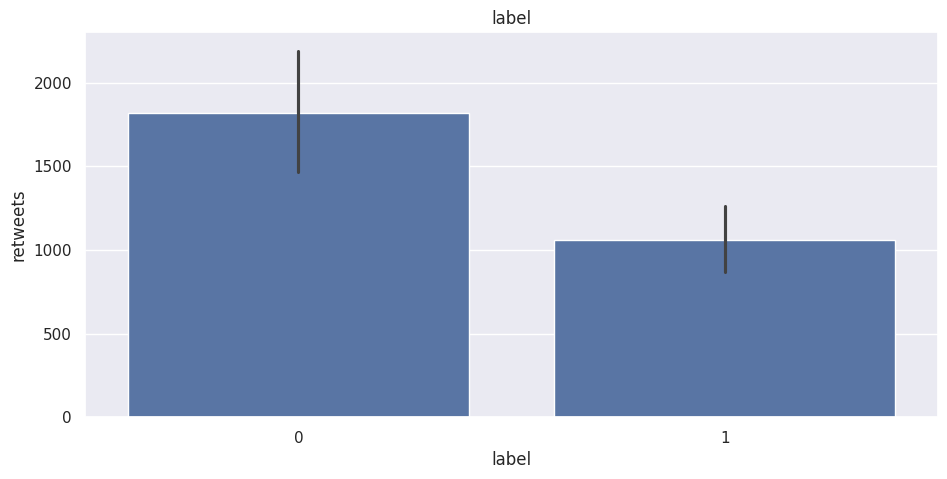

In [53]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="label", y="retweets").set(title="label");

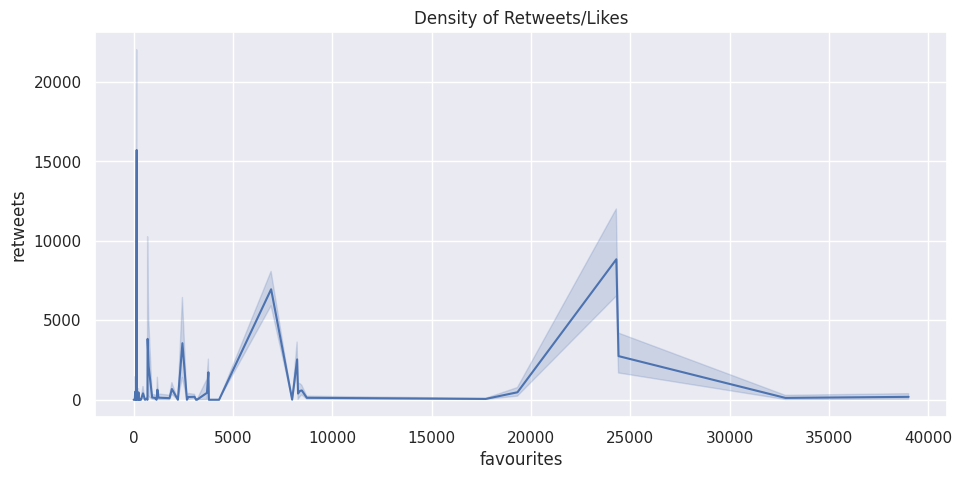

In [54]:
sns.lineplot(data=df, x="favourites", y="retweets").set(title="Density of Retweets/Likes");

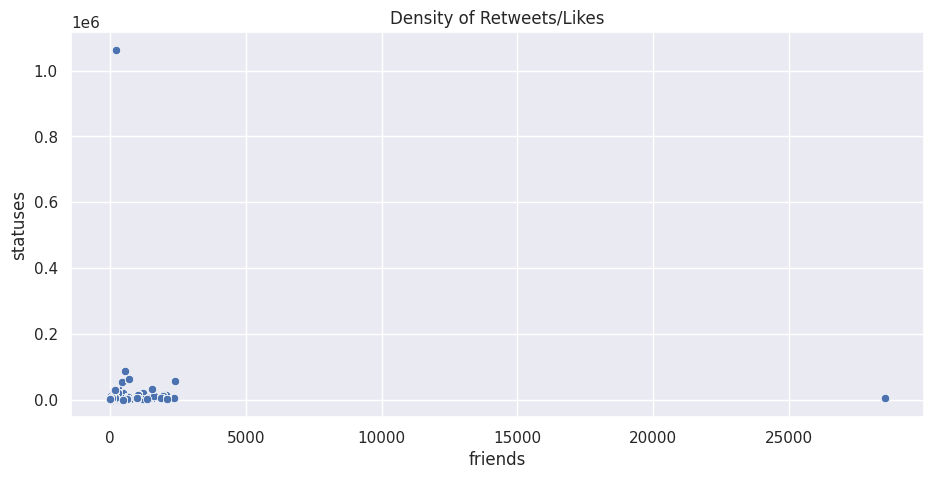

In [55]:
sns.scatterplot(data=df, x="friends", y="statuses",).set(title="Density of Retweets/Likes");

In [56]:
from textblob import TextBlob

In [57]:


blob_emptyline2 = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)



In [60]:
df_blob2 = pd.DataFrame(blob_emptyline2)


In [61]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",15,0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,8,2015,"[sunday, need, break, i, 'm, planning, spend, ...",10,-0.093750,0.750000
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18,1.000000,0.875000
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16,-0.045833,0.370833


In [62]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

In [63]:
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,2 years since diagnosed #anxiety #depression. ...,84,211,251,837,0,1,8,2015,"[2, years, since, diagnosed, anxiety, depressi...",15,0.100000,1.000000,Positive
1,"sunday, need break, i'm planning spend little ...",84,211,251,837,1,1,8,2015,"[sunday, need, break, i, 'm, planning, spend, ...",10,-0.093750,0.750000,Negative
2,awake tired. need sleep brain ideas...,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,Negative
3,rt @sewhq: #retro bears make perfect gifts gre...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",18,1.000000,0.875000,Positive
4,it’s hard say whether packing lists making lif...,84,211,251,837,1,1,8,2015,"[it, ’, s, hard, say, whether, packing, lists,...",16,-0.045833,0.370833,Negative


In [64]:
result = df_blob3["Sentiment"].value_counts()

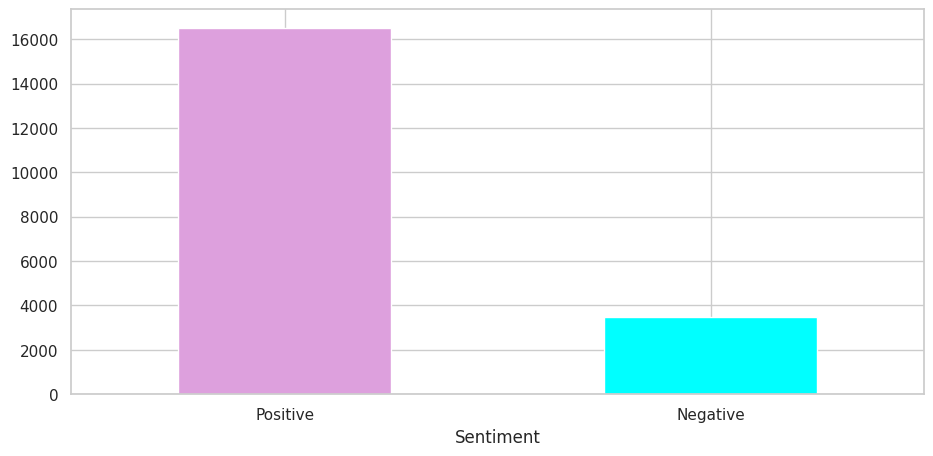

In [65]:

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);


In [66]:
df_blob3.groupby("Sentiment").count()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity
Sentiment,,,,,,,,,,,,,
Negative,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480,3480
Positive,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520,16520


In [67]:
df_blob3.groupby("polarity").max()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,subjectivity,Sentiment
polarity,,,,,,,,,,,,,
-1.000000,"wrong! said nsa &amp; cia, others convinces us...",3088,2389,24407,1063601,39124,1,12,2017,"[wrong, said, nsa, amp, cia, others, convinces...",16,1.000000,Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,126,621,22,2111,0,0,12,2016,"[thebotanophile, jasonmillerindc, realdonaldtr...",15,1.000000,Negative
-0.976563,@the_newright everyone knows false news fromtn...,126,621,22,2111,0,0,1,2017,"[the_newright, everyone, knows, false, news, f...",6,0.600000,Negative
-0.976562,exxonmobil helped defeat russia sanctions bill...,126,621,243,2111,0,1,12,2016,"[politicususa, joe, amp, mika, trump, putin, c...",18,1.000000,Negative
-0.953674,really wan informed watch @cbsthismorning !!!!...,126,621,22,2111,0,0,1,2017,"[really, wan, informed, watch, cbsthismorning,...",7,0.150000,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.883333,rt @1phoebejtonkin: happy birthday beautiful @...,235,185,24407,22302,1426,0,1,2017,"[rt, 1phoebejtonkin, happy, birthday, beautifu...",13,0.766667,Positive
0.900000,surrogates @realdonaldtrump obnoxious incredib...,2377,2389,24407,86352,191503,1,12,2017,"[tyce, happy, birthday, happy, belting]",18,1.000000,Positive
0.937500,rt @arianagrande: @xxtirzajessxx women (and me...,235,621,24407,22302,14166,1,12,2017,"[seanhannity, one, kind, lowest, form, humanit...",15,0.950000,Positive


In [68]:


df[df["post_text"].str.contains("zayn")]
TextBlob(df.iloc[6250,0]).tags



[('rt', 'NN'),
 ('@', 'NN'),
 ('zaynmalikind', 'NN'),
 ('boys', 'JJ'),
 ('backstage', 'NN'),
 ('bbmas', 'NN'),
 ('52', 'CD'),
 ('http', 'NN'),
 ('//t.co/ly58y7jyzu', 'NN')]

In [69]:


df[df["post_text"].str.contains("bumbling")]
TextBlob(df.iloc[12571,0]).tags



[('worst', 'RB'),
 ('bumbling', 'NN'),
 ('stumbling', 'VBG'),
 ('statement', 'NN'),
 ('i', 'NN'),
 ("'ve", 'VBP'),
 ('seen', 'VBN'),
 ('while', 'IN'),
 ('intergity', 'NN'),
 ('credibility', 'NN'),
 ('sense', 'NN'),
 ('said', 'VBD'),
 ('…', 'JJ'),
 ('https', 'NN'),
 ('//t.co/smlgu5lemt', 'NN')]